In [1]:
import numpy as np
from cellpose import plot as cellplot
from cellpose import utils as cellutils
import os
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual


# Pre-segmented

## First, 2d data

In [2]:
# Get location of pre-segmented data
folder_name = r'Y:\shared_projects\wbfm\cellpose_test_data'
file_name = 'img0000_seg.npy'

file_name = os.path.join(folder_name, file_name)

dat = np.load(file_name, allow_pickle=True).item()


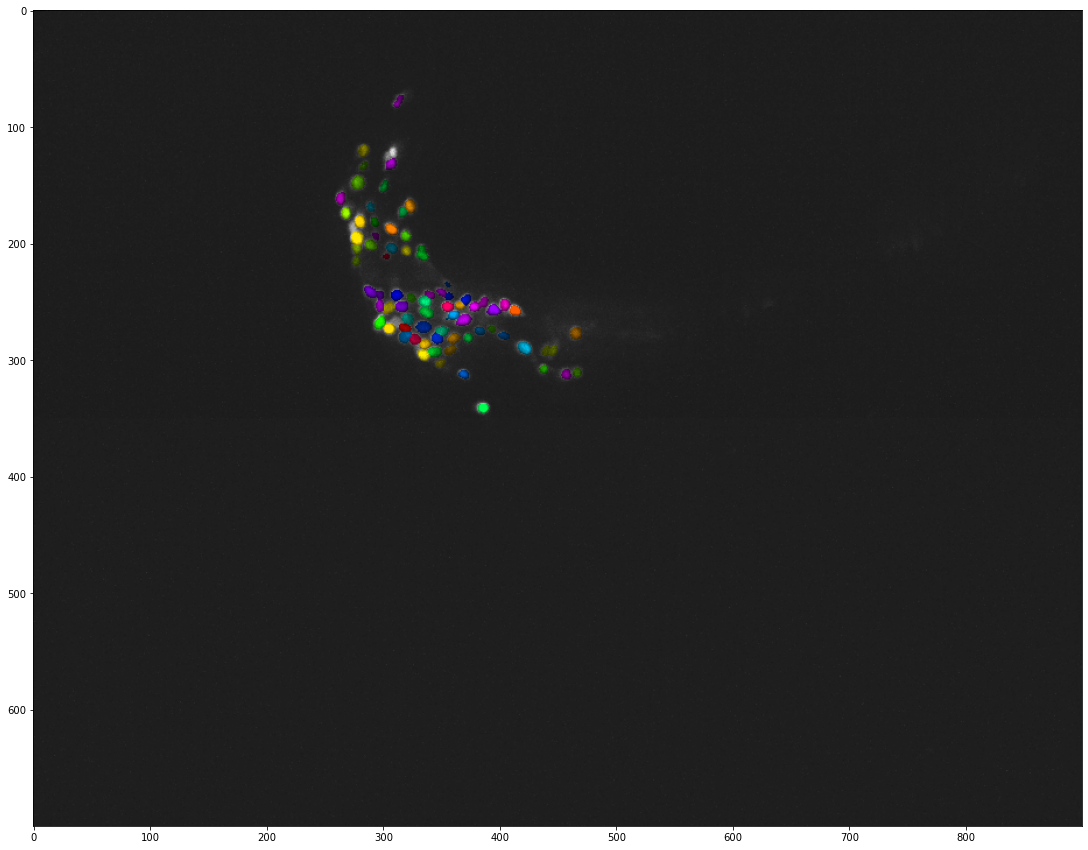

In [29]:
# plot image with masks overlaid
plt.figure(figsize=(45,15))

mask_RGB = cellpose.plot.mask_overlay(dat['img'], dat['masks'],
                        colors=np.array(dat['colors']))
plt.imshow(mask_RGB)

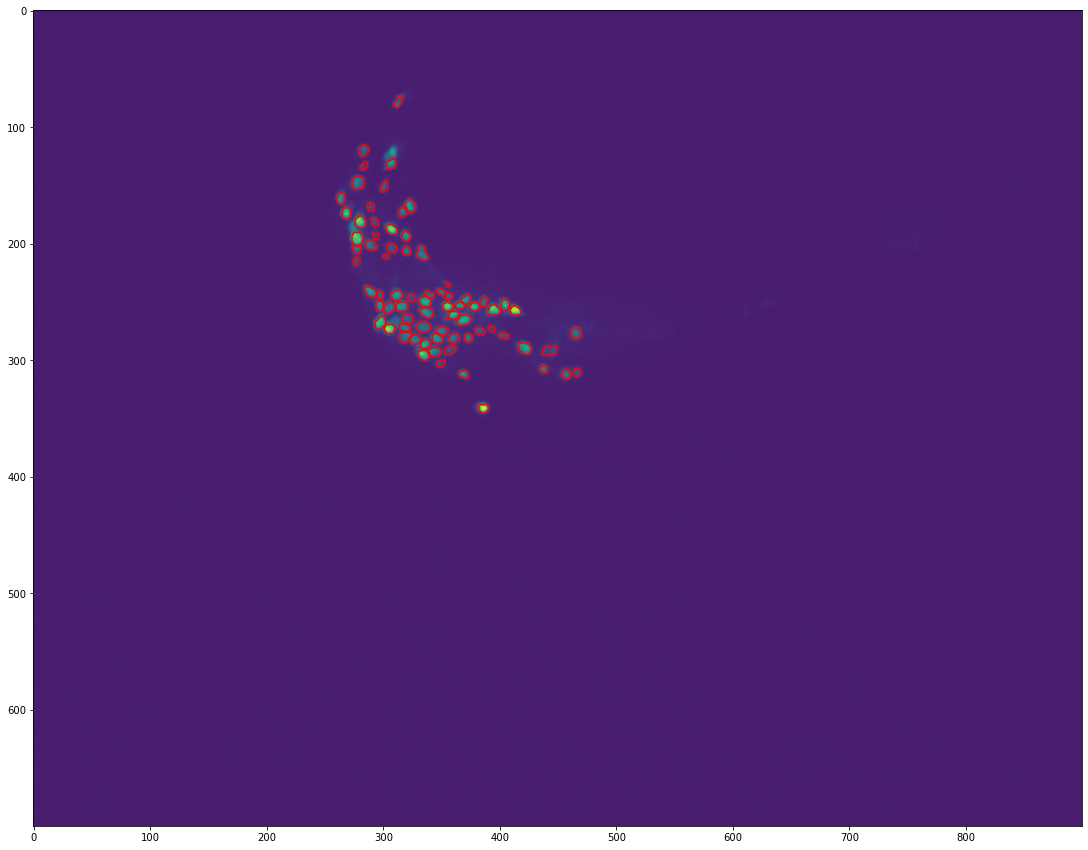

In [30]:
# plot image with outlines overlaid in red
outlines = cellpose.utils.outlines_list(dat['masks'])
plt.figure(figsize=(45,15))
plt.imshow(dat['img'])
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

In [25]:
dat['outlines']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

## Second, 3d data

In [20]:
# Get location of pre-segmented data
folder_name = r'Y:\shared_projects\wbfm\cellpose_test_data'
file_name = 'one_volume_seg.npy'

file_name = os.path.join(folder_name, file_name)
dat = np.load(file_name, allow_pickle=True).item()

# We also need to separately load the image
import tifffile

file_name = 'one_volume.tif'
file_name = os.path.join(folder_name, file_name)
img = tifffile.imread(file_name)

In [4]:
# plot image with masks overlaid
dat.keys()

dict_keys(['outlines', 'colors', 'masks', 'current_channel', 'filename', 'flows', 'zdraw'])

In [64]:
outlines = [cellutils.outlines_list(single_slice_mask) for single_slice_mask in dat['masks']]


In [85]:
# plot image with outlines overlaid in red
# New: WIDGET
plt.figure(figsize=(45,15))
    
%matplotlib inline
def f(i):
    fig, ax = plt.subplots(1,1,figsize=(45, 15))
#     ax = axes.ravel()
    
    plt.imshow(img[i,...])
    for o in outlines[i]:
        plt.plot(o[:,0], o[:,1], color='r')
    plt.title(f'Slice {i}')
    
interact(f, i=(0,img.shape[0]-1));

interactive(children=(IntSlider(value=16, description='i', max=32), Output()), _dom_classes=('widget-interact'…

## Brightness tests

In [92]:
def brightness_from_roi(img, cellpose_dat, which_neuron):
    """
    Just averages the pixels
    """
    mask = cellpose_dat['masks']==which_neuron
    brightness = np.mean(img[mask])
    
    return brightness

164.48387096774192

In [104]:
# plot image with outlines overlaid in red
plt.figure(figsize=(45,15))
    
%matplotlib inline
def f(z, which_neuron):
    fig, ax = plt.subplots(1,1,figsize=(45, 15))
#     ax = axes.ravel()
    
    plt.imshow(img[z,...])
    for o in outlines[z]:
        plt.plot(o[:,0], o[:,1], color='r')
    # An extra one for the current target
    mask = dat['masks'][z,...]==which_neuron
    nnz = np.count_nonzero(mask)
    if nnz>0:
        plt.imshow(mask)
        print(f'Found {nnz} pixels')
    else:
        print("Neuron not on this plane")
        
    b = brightness_from_roi(img, dat, which_neuron)
    
    plt.title(f'Slice {z}, Neuron {which_neuron}, Brightness {b}')
    
interact(f, z=(0,img.shape[0]-1), which_neuron=(0,200));

interactive(children=(IntSlider(value=16, description='z', max=32), IntSlider(value=100, description='which_ne…

# Redo segmentation

## First, 2d

In [2]:
from cellpose import models, io

In [12]:
# Get location of single volume to be used
folder_name = r'Y:\shared_projects\wbfm\cellpose_test_data'
file_name = 'img0000.png'

file_name = os.path.join(folder_name, file_name)

save_filename = os.path.join(folder_name, 'img0000_notebook.png')

In [6]:
model = models.Cellpose(gpu=False, model_type='nuclei')


>>>> using CPU
cellpose_residual_on_style_on_concatenation_off


In [11]:
# Settings
channels = [0,0] # Grayscale image
diameter = 8
img = io.imread(file_name)


In [13]:
masks, flows, styles, diams = model.eval(img, diameter=diameter, channels=channels)

processing 1 image(s)
time spent: running network 36.84s; flow+mask computation 7.01
estimated masks for 1 image(s) in 43.96 sec
>>>> TOTAL TIME 43.96 sec


In [16]:
# save results so you can load in gui
io.masks_flows_to_seg(img, masks, flows, diams, save_filename, channels)

# save results as png
io.save_to_png(img, masks, flows, save_filename)

## Next, 3d

In [3]:
# Get location of single volume to be used
folder_name = r'Y:\shared_projects\wbfm\cellpose_test_data'
file_name = 'one_volume_cropped.tif'

file_name = os.path.join(folder_name, file_name)

save_filename = os.path.join(folder_name, 'one_volume_cropped_notebook.tif')

model = models.Cellpose(gpu=False, model_type='nuclei')

# Settings
channels = [0,0] # Grayscale image
diameter = 8
img = io.imread(file_name)


>>>> using CPU
cellpose_residual_on_style_on_concatenation_off


In [4]:
masks, flows, styles, diams = model.eval(img, diameter=diameter, channels=channels, do_3D=True)

processing 1 image(s)
multi-stack tiff read in as having 28 planes 1 channels

 running YX: 28 planes of size (328, 470) 




100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:51<00:00,  3.71s/it]



 running ZY: 328 planes of size (28, 470) 




100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [00:53<00:00,  1.23it/s]



 running ZX: 470 planes of size (28, 328) 




100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:51<00:00,  1.14it/s]


flows computed 649.19s
dynamics computed 649.61s
masks computed 656.03s
estimated masks for 1 image(s) in 661.38 sec
>>>> TOTAL TIME 661.38 sec


## Finally, try a small cropped cube

In [28]:
# Use the project config file
from DLC_for_WBFM.bin.configuration_definition import *
%load_ext autoreload
%autoreload 2


fname = 'test_project.pickle'

proj = pickle.load(open(fname, 'rb'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
print(proj)

                Field values:
                task_name: test 
                experimenter: Charlie 
                config_filename: test_project
                Which subclasses are initialized?
                datafiles: True
                preprocessing: True
                tracking: True
                traces: True



# FAILED Bokeh tests

In [84]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource

# Initialize
# Interactive images: https://discourse.bokeh.org/t/possible-to-update-a-image-rgba-on-change-of-a-widget/1978
source = ColumnDataSource({'image': [img]})
sz = img[0].shape
p = figure(title="image", plot_height=sz[0], plot_width=sz[1])
tmp = p.image(image=[img[15,...]], x=[0], y=[0], dw=[sz[1]], dh=[sz[0]])
# tmp = p.image(image='image', x=0, y=0, dw=100, dh=100, source=source)

def update(z=15):
    tmp.data_source.data['image'] = [img[z,...]]
    for o in outlines[z]:
        if len(o)>0:
            p.line(o[:,1], o[:,0], color='red')
            break
    print("finished plotting dots")
    push_notebook()
    
show(p, notebook_handle=True)
# show(p)

interact(update, z=(0,img.shape[0]-1))


interactive(children=(IntSlider(value=15, description='z', max=32), Output()), _dom_classes=('widget-interact'…

<function __main__.update(z=15)>

In [76]:
%debug

> <ipython-input-75-bbc236cc93cf>(16)update()
     14 #         p.circle([o[:,0]], [o[:,1]], size=0.1, color='r')
     15 #         p.scatter([o[:,0]], [o[:,1]], size=100, color='red')
---> 16         p.scatter([o[0,0]], [o[0,1]], size=100, color='red')
     17     print("finished plotting dots")
     18     push_notebook()

ipdb> o
array([], shape=(0, 2), dtype=float64)
ipdb> outlines[z]
[array([], shape=(0, 2), dtype=float64), array([], shape=(0, 2), dtype=float64), array([], shape=(0, 2), dtype=float64), array([], shape=(0, 2), dtype=float64), array([[326, 293],
       [325, 294],
       [324, 295],
       [324, 296],
       [324, 297],
       [324, 298],
       [324, 299],
       [325, 300],
       [326, 301],
       [327, 301],
       [328, 300],
       [329, 299],
       [329, 298],
       [330, 297],
       [329, 296],
       [329, 295],
       [329, 294],
       [328, 293],
       [327, 293]]), array([], shape=(0, 2), dtype=float64), array([[231, 334],
       [231, 335],
      

ipdb> outlines[z][0]
array([], shape=(0, 2), dtype=float64)
ipdb> outlines[z][1]
array([], shape=(0, 2), dtype=float64)
ipdb> outlines[z][3]
array([], shape=(0, 2), dtype=float64)
ipdb> outlines[z][10]
array([[295, 308],
       [295, 309],
       [294, 310],
       [294, 311],
       [293, 312],
       [293, 313],
       [293, 314],
       [293, 315],
       [294, 316],
       [295, 317],
       [296, 317],
       [297, 316],
       [298, 315],
       [298, 314],
       [299, 313],
       [299, 312],
       [299, 311],
       [300, 310],
       [301, 310],
       [302, 309],
       [303, 309],
       [304, 310],
       [304, 309],
       [304, 308],
       [303, 308],
       [302, 308],
       [301, 308],
       [300, 309],
       [299, 309],
       [298, 309],
       [297, 309],
       [296, 309]])
ipdb> q


## Bokeh tests

In [20]:
import numpy as np

from bokeh.plotting import figure, output_file, show

N = 500
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)
d = np.sin(xx)*np.cos(yy)

p = figure(tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])
p.x_range.range_padding = p.y_range.range_padding = 0

# must give a vector of image data for image parameter
p.image(image=[d], x=0, y=0, dw=10, dh=10, palette="Spectral11", level="image")
p.grid.grid_line_width = 0.5

output_file("image.html", title="image.py example")

show(p)

In [38]:
import numpy as np

from bokeh.plotting import figure, output_file, show

# create an array of RGBA data
N = 20
img2 = np.empty((N, N), dtype=np.uint32)
view = img2.view(dtype=np.uint8).reshape((N, N, 4))
for i in range(N):
    for j in range(N):
        view[i, j, 0] = int(255 * i / N)
        view[i, j, 1] = 158
        view[i, j, 2] = int(255 * j / N)
        view[i, j, 3] = 255

reset_output()
output_notebook()

p = figure()

p.image_rgba(image=[img2], x=[0], y=[0], dw=[10], dh=[10])

show(p)

Loading BokehJS ...

In [41]:
img2.dtype

dtype('uint32')

In [7]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook, reset_output
from bokeh.plotting import figure

reset_output()
output_notebook()

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()
    
show(p, notebook_handle=True)

interact(update, f=["sin", "cos"], w=(0,50), A=(-10,10), phi=(0, 20, 0.1))

Loading BokehJS ...

interactive(children=(Dropdown(description='f', options=('sin', 'cos'), value='sin'), IntSlider(value=1, descr…

<function __main__.update(f, w=1, A=1, phi=0)>